In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib

print(matplotlib.__version__)

2.2.3


In [2]:
# Load the data set containing durations between calls arriving at the call center.
# All values are in minutes.
waiting_times_day = np.loadtxt('/Users/ash/Downloads/call_center.csv')

In [3]:
print('Size of data set:', len(waiting_times_day))
print('First 3 values in data set:', waiting_times_day[:3])
print('Sum of data set:', sum(waiting_times_day))

Size of data set: 5891
First 3 values in data set: [5.36 2.48 8.08]
Sum of data set: 1442.145437310004


In [4]:
# Split the data into 24 separate series, one for each hour of the day
current_time = 0
waiting_times_per_hour = [[] for _ in range(24)]  # Make 24 empty lists, one per hour
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)
hour_list = []
for hour, waiting_times_hour in enumerate(waiting_times_per_hour):
    print('%02i:00-%02i:00 - %i calls' % (hour, hour + 1, len(waiting_times_hour)))
    hour_list.append('%2i-%2i' % (hour, hour + 1))

00:00-01:00 - 7 calls
01:00-02:00 - 5 calls
02:00-03:00 - 8 calls
03:00-04:00 - 7 calls
04:00-05:00 - 21 calls
05:00-06:00 - 42 calls
06:00-07:00 - 96 calls
07:00-08:00 - 189 calls
08:00-09:00 - 274 calls
09:00-10:00 - 344 calls
10:00-11:00 - 487 calls
11:00-12:00 - 892 calls
12:00-13:00 - 869 calls
13:00-14:00 - 401 calls
14:00-15:00 - 206 calls
15:00-16:00 - 169 calls
16:00-17:00 - 261 calls
17:00-18:00 - 430 calls
18:00-19:00 - 579 calls
19:00-20:00 - 383 calls
20:00-21:00 - 136 calls
21:00-22:00 - 45 calls
22:00-23:00 - 28 calls
23:00-24:00 - 12 calls


# Task 1: Plot the number of calls per hour


Use Matplotlib to visualize the number of calls that arrive during each hour of the day. The numbers are shown in the output above. You should find an appropriate way to visualize it.

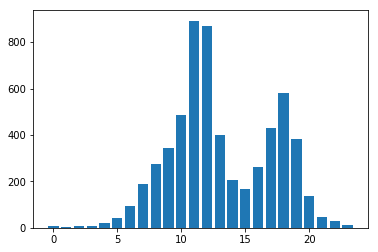

In [5]:
count_list = [len(_) for _ in waiting_times_per_hour]
dumb = [_ for _ in range(24)]
plt.bar(dumb, count_list)
# plt.xticks(dumb, hour_list)
plt.show()

# Task 2: Plot a histogram of the durations for one hour

Take the data for the 11th hour (so between 11am and 12pm) and plot a histogram showing the distribution over waiting times between calls during that hour.

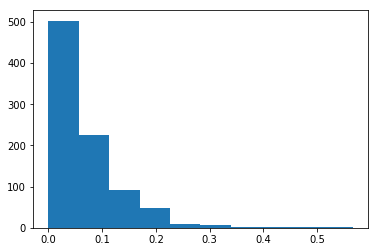

In [6]:
plt.hist(waiting_times_per_hour[11], bins=10) 
plt.show()


# Task 3: Guess the distribution

What type of distribution best represents the data in your histogram?
- Identify a type of distribution}: this is probably an exponential distribution because of two reasons: 1) the variable we are trying to model here is waiting time between calls so it's continuous and 2) assuming that the calls to the center are independent (which is often true unless some event happens that make the calls correlate with each other) and happen at a fixed average rate (also reasonable since we are focusing on an interval of 11:00-12:00, which the rate of calls can be considered a constant) we have the wait time between calls to be the type of random variable the exponential function typically used to model. 
- Guess what the parameters of the distribution are: the half-life looks about 0.05, so the rate is about $\frac{ln(2)}{0.05} = 13.86$.
- Plot the pdf of your best guess on top of your histogram, to see if they match.
* Important: you have to normalize your histogram so that it will have the same vertical scale as the plot of the pdf. You can normalize a histogram by using the argument density=True in the hist function.

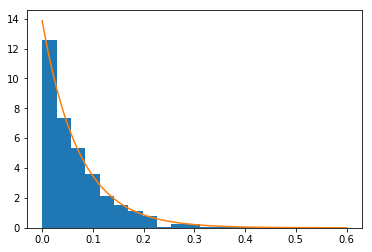

In [17]:
plt.hist(waiting_times_per_hour[11], bins=20, density=True) 
dist = stats.expon(loc=0, scale=1/13.86)
x = np.linspace(0, 0.6, 100)
plt.plot(x, dist.pdf(x))
plt.show()